In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt


--2020-10-05 14:29:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-10-05 14:29:10 (90.9 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
data = open('/tmp/sonnets.txt').read()

sentences = data.lower().split('\n')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
# print(word_index)
total_words = len(word_index) + 1

In [4]:
sequences = []
for sentence in sentences:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[0:i+1]
        sequences.append(n_gram_sequence)

In [5]:
max_sequence_len = max([len(x) for x in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = sequences[:,:-1], sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.LSTM(100),
                             tf.keras.layers.Dense(total_words/2, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                             tf.keras.layers.Dense(total_words, activation="softmax")
])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(xs, ys, epochs=100)

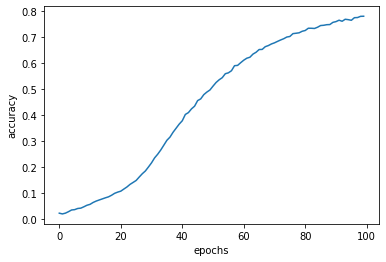

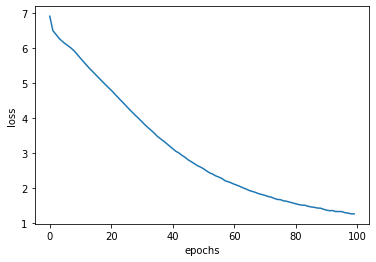

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = reverse_word_index[int(predicted)]
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope or fly his store do lie by prove thine great true pride ' lies ' find all ill thine glory in the thing it doth stay or place shown did hate made old gone more lived than prove 'will ' than under of burn ill both than both forgot for you so clear ill glory in me my parts time alone more in your will must bear rolling praise room rolling bear rolling ' than increase clears ' lies so near him old prove true rotten groan can grow great state me swearing mine prove memory true state in thee
